In [1]:
import numpy as np
from scipy.stats import gamma
import seaborn as sns
import pandas as pd

## Modelo hipsométrico

Referência: https://acta.inpa.gov.br/fasciculos/35-3/BODY/v35n3a07.html

In [2]:
b0 = -8.8722
b1 = 3.4217
b2 = 0.1382
dap = 250

(((dap**2)/(b0 + b1 * dap + b2 * dap**2))**2)+1.3

44.728227919314556

## Objeto árvore

In [3]:
%run -i '/home/gorgens/Github/simFor/nativaPy/agente_arvore.py'

# Simulação 1

- Especies: uniforme
- DAP: J-reverso

In [4]:
nSp = 10
narv = 600
areaHa = 1.

## Gerador espécies uniforme

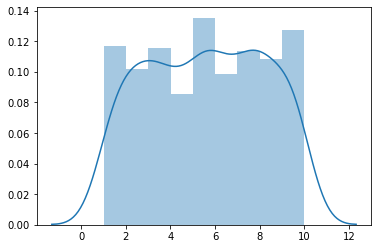

In [5]:
sp = np.random.uniform(1,nSp,narv)
sns.distplot(sp)

## Gerador DAP em J-reverso

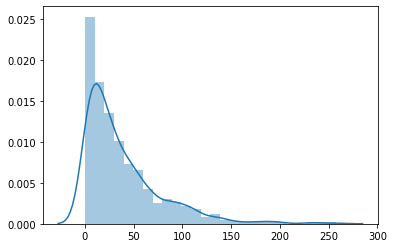

In [6]:
dap = gamma.rvs(0.8, scale = 50, size=600)
sns.distplot(dap)

## Gera floresta

In [7]:
floresta = []

for i in range(narv):
 floresta.append(arvore('sp'+str(int(np.random.uniform(1,nSp,1)[0])), 
                        None, 
                        gamma.rvs(0.8, scale = 50, size=1)[0]))

In [8]:
f_dap = [i.dap for i in floresta]
f_h = [i.alt for i in floresta]
f_sp = [i.sp for i in floresta]
f_s = [i.s for i in floresta]
dfFloresta = pd.DataFrame(list(zip(f_sp, f_dap, f_h, f_s)),
                         columns = ['sp', 'dap', 'altura', 'as'])
dfFloresta.head()

,sp,dap,altura,as
0,sp7,84.335630,33.030794,0.558331
1,sp2,0.862138,1.316313,0.000058
2,sp5,5.362369,5.870587,0.002257
3,sp2,162.849728,40.916743,2.081823
4,sp1,1.003584,1.336126,0.000079


In [9]:
densidade = dfFloresta.pivot_table(values='dap', index = 'sp', aggfunc='count')
densidade = densidade.rename_axis(None)
densidade = densidade.rename_axis(None, axis='columns')
densidade.columns = ['Nind']
densidade['DA'] = densidade.apply(lambda x: x['Nind']/areaHa, axis=1)
densidade['DR'] = densidade.apply(lambda x: x['DA']/sum(densidade['DA']), axis=1)
densidade

,Nind,DA,DR
sp1,69,69.0,0.115000
sp2,60,60.0,0.100000
sp3,68,68.0,0.113333
sp4,59,59.0,0.098333
sp5,65,65.0,0.108333
sp6,67,67.0,0.111667
sp7,74,74.0,0.123333
sp8,62,62.0,0.103333
sp9,76,76.0,0.126667


In [10]:
dominancia = dfFloresta.pivot_table(values='as', index = 'sp', aggfunc='sum')
dominancia = dominancia.rename_axis(None)
dominancia = dominancia.rename_axis(None, axis='columns')
dominancia.columns = ['AS']
dominancia['DoA'] = dominancia.apply(lambda x: x['AS']/areaHa, axis=1)
dominancia['DoR'] = dominancia.apply(lambda x: x['DoA']/sum(dominancia['DoA']), axis=1)
dominancia

,AS,DoA,DoR
sp1,14.258619,14.258619,0.085538
sp2,20.072520,20.072520,0.120415
sp3,14.271922,14.271922,0.085618
sp4,13.863839,13.863839,0.083169
sp5,15.171281,15.171281,0.091013
sp6,20.321718,20.321718,0.121910
sp7,26.917960,26.917960,0.161481
sp8,19.580212,19.580212,0.117462
sp9,22.235805,22.235805,0.133393


In [11]:
vc = (densidade['DR'] + dominancia['DoR'])/2
vc

sp1    0.100269
sp2    0.110208
sp3    0.099475
sp4    0.090751
sp5    0.099673
sp6    0.116789
sp7    0.142407
sp8    0.110398
sp9    0.130030
dtype: float64

# Simulação 2

- Especies: Gama
- DAP: J-reverso

In [12]:
nSp = 10
narv = 600
areaHa = 1.

## Gerador espécies gama

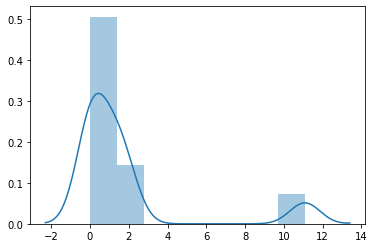

In [13]:
sp = gamma.rvs(0.5, scale = 5, size=nSp)
sns.distplot(sp)

## Gerador DAP J-reverso

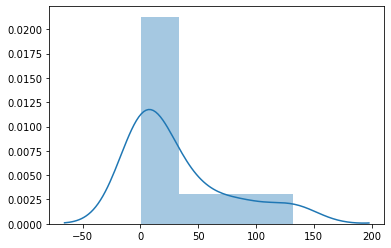

In [14]:
dap = gamma.rvs(0.8, scale = 50, size=nSp)
sns.distplot(dap)

## Gera uma floresta

In [15]:
floresta = []

for i in range(narv):
 floresta.append(arvore('sp'+str(int(gamma.rvs(0.5, scale = 5, size=1)[0]+1)), 
                        None, 
                        gamma.rvs(0.8, scale = 50, size=1)[0]))

In [16]:
f_dap = [i.dap for i in floresta]
f_h = [i.alt for i in floresta]
f_sp = [i.sp for i in floresta]
f_s = [i.s for i in floresta]
dfFloresta = pd.DataFrame(list(zip(f_sp, f_dap, f_h, f_s)),
                         columns = ['sp', 'dap', 'altura', 'as'])
dfFloresta.head()

,sp,dap,altura,as
0,sp1,8.400184,6.974282,0.005539
1,sp31,37.631641,21.434067,0.111167
2,sp1,25.151188,16.067909,0.049658
3,sp1,5.536044,5.889458,0.002406
4,sp1,28.717000,17.745058,0.064736


In [17]:
densidade = dfFloresta.pivot_table(values='dap', index = 'sp', aggfunc='count')
densidade = densidade.rename_axis(None)
densidade = densidade.rename_axis(None, axis='columns')
densidade.columns = ['Nind']
densidade['DA'] = densidade.apply(lambda x: x['Nind']/areaHa, axis=1)
densidade['DR'] = densidade.apply(lambda x: x['DA']/sum(densidade['DA']), axis=1)
densidade

,Nind,DA,DR
sp1,277,277.0,0.461667
sp10,11,11.0,0.018333
sp11,4,4.0,0.006667
sp12,5,5.0,0.008333
sp13,3,3.0,0.005000
sp14,1,1.0,0.001667
sp15,3,3.0,0.005000
sp16,4,4.0,0.006667
sp17,2,2.0,0.003333
sp18,1,1.0,0.001667


In [18]:
dominancia = dfFloresta.pivot_table(values='as', index = 'sp', aggfunc='sum')
dominancia = dominancia.rename_axis(None)
dominancia = dominancia.rename_axis(None, axis='columns')
dominancia.columns = ['AS']
dominancia['DoA'] = dominancia.apply(lambda x: x['AS']/areaHa, axis=1)
dominancia['DoR'] = dominancia.apply(lambda x: x['DoA']/sum(dominancia['DoA']), axis=1)
dominancia

,AS,DoA,DoR
sp1,69.981806,69.981806,0.394178
sp10,1.757374,1.757374,0.009899
sp11,0.348378,0.348378,0.001962
sp12,0.186908,0.186908,0.001053
sp13,0.910116,0.910116,0.005126
sp14,0.458842,0.458842,0.002584
sp15,0.006516,0.006516,0.000037
sp16,1.122796,1.122796,0.006324
sp17,0.076886,0.076886,0.000433
sp18,0.000935,0.000935,0.000005


In [19]:
vc = (densidade['DR'] + dominancia['DoR'])/2
vc

sp1     0.427923
sp10    0.014116
sp11    0.004314
sp12    0.004693
sp13    0.005063
sp14    0.002126
sp15    0.002518
sp16    0.006495
sp17    0.001883
sp18    0.000836
sp19    0.000964
sp2     0.200144
sp21    0.000844
sp3     0.084584
sp31    0.001146
sp4     0.085151
sp5     0.046867
sp6     0.045473
sp7     0.034508
sp8     0.023487
sp9     0.006865
dtype: float64